# Upper Confidence Bound (UCB)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

Ficheiro com taxa de cliques.

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


As linhas são os usuários, e as colunas os anuncios. Valor 0 se o user não clicou no ad e 1 se clicou.

## Implementing UCB

In [4]:
import math

#Step 1: At each round, we consider two numbers for each i:
#N- number os times the ad i was selected up to round n (number_of_selections)
#R - sum of rewards of the ad i up to round n (sum_of_rewards)

N = 500
d = 10  #number of ads
ads_selected = []
numbers_of_selections = [0] * d  #cada vez que selecionamos um ad, vai aumentar o valor até ano máx 10
sums_of_rewards = [0] * d
total_reward = 0

#Step 2: From these two numbers we compute: i) the average reward of ad i up to round n and ii) the confidence level at round n
for n in range(0, N):
    ad = 0
    max_ucb = 0
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])  #colocamos n+1 para evitar tem log(0) que é menos infinito 
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  #truque para ter um valor super alto. Esta condição é para o caso de algum dos ads não ter sido selecionado
        if upper_bound > max_ucb:
            max_ucb = upper_bound
            ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] = numbers_of_selections[ad]+ 1
        reward =  dataset.values[n,ad]
        sums_of_rewards[ad] = sums_of_rewards[ad]  + reward
        total_reward = total_reward +  reward
            


## Visualising the results

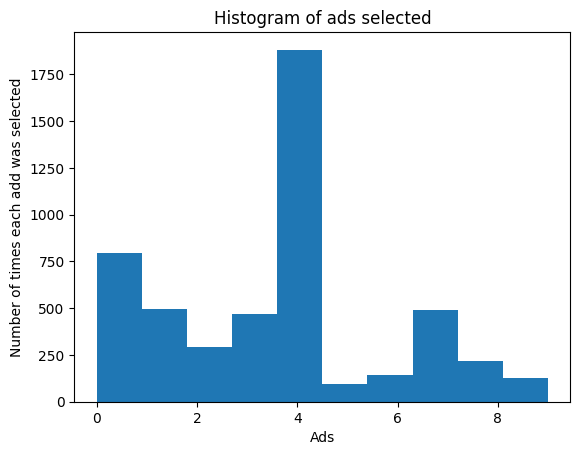

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each add was selected')
plt.show()